In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sub = pd.read_csv('data/sample_solution.csv')

# EDA для общих данных

In [3]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [4]:
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
0,7,State_1,Commercial,Grocery_store_or_food_market,28484.0,1994.0,37.0,2.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75757
1,7,State_1,Commercial,Grocery_store_or_food_market,21906.0,1961.0,55.0,45.7,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75758
2,7,State_1,Commercial,Grocery_store_or_food_market,16138.0,1950.0,1.0,59.1,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75759
3,7,State_1,Commercial,Grocery_store_or_food_market,97422.0,1971.0,34.0,35.4,38,50.596774,...,0,29,5,2,0,NaN,NaN,NaN,NaN,75760
4,7,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,35.0,1.8,38,50.596774,...,0,29,5,2,0,340.0,330.0,22.8,126.0,75761


Text(0, 0.5, 'Количество зданий')

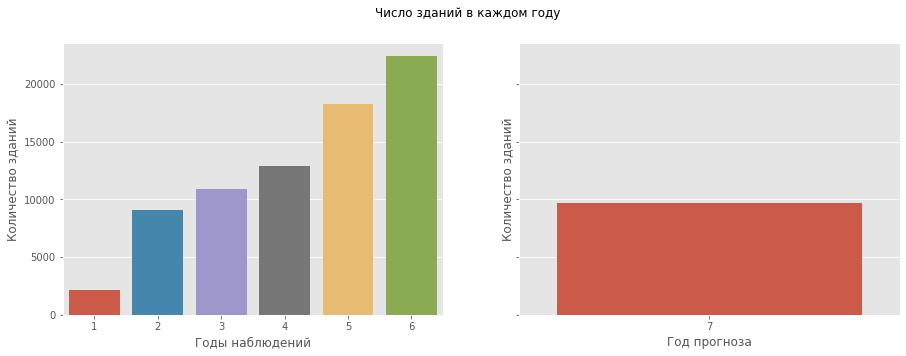

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Число зданий в каждом году')

sns.countplot(ax=axes[0], data=train, x='Year_Factor')
sns.countplot(ax=axes[1], data=test,x='Year_Factor')
axes[0].set_xlabel('Годы наблюдений')
axes[0].set_ylabel('Количество зданий')
axes[1].set_xlabel('Год прогноза')
axes[1].set_ylabel('Количество зданий')

Постепенное увеличение данных из года в год.

Следовательно, прогнозируем год №7.

Text(0, 0.5, 'Количество зданий')

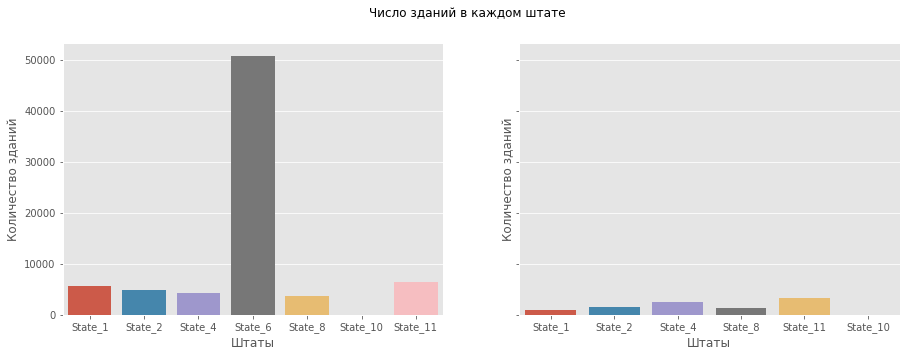

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Число зданий в каждом штате')

sns.countplot(ax=axes[0], data=train, x='State_Factor')
sns.countplot(ax=axes[1], data=test,x='State_Factor')
axes[0].set_xlabel('Штаты')
axes[0].set_ylabel('Количество зданий')
axes[1].set_xlabel('Штаты')
axes[1].set_ylabel('Количество зданий')

In [44]:
display(train['State_Factor'].value_counts(), test['State_Factor'].value_counts())

State_6     50840
State_11     6412
State_1      5618
State_2      4871
State_4      4300
State_8      3701
State_10       15
Name: State_Factor, dtype: int64

State_11    3268
State_4     2568
State_2     1515
State_8     1323
State_1     1027
State_10       4
Name: State_Factor, dtype: int64

Видим, что хоть и большинство зданий находятся в State_6, в прогнозе этого штата нет.

Text(0, 0.5, 'Количество зданий')

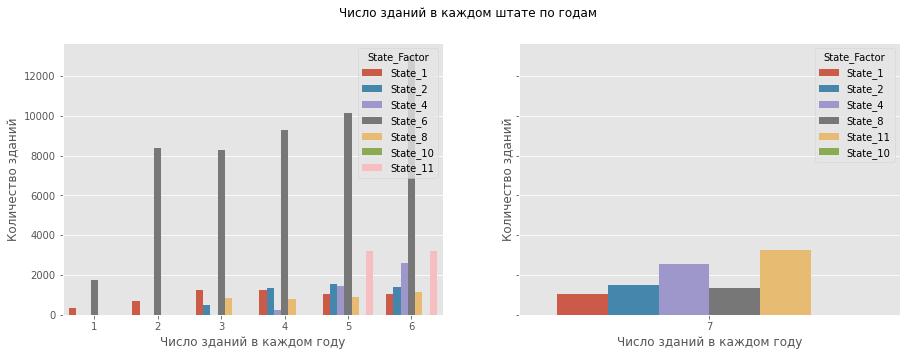

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Число зданий в каждом штате по годам')

sns.countplot(ax=axes[0], data=train, x='Year_Factor', hue='State_Factor')
sns.countplot(ax=axes[1], data=test, x='Year_Factor', hue='State_Factor')
axes[0].set_xlabel('Число зданий в каждом году')
axes[0].set_ylabel('Количество зданий')
axes[1].set_xlabel('Число зданий в каждом году')
axes[1].set_ylabel('Количество зданий')


Видно, что что-то произошло в годе №2 такое, что кол-во зданий участвующих в оценке увеличилось 4+ раза.

Ни в обучающей, ни в тестовой выборке дисбаланса классов нет.

Text(0, 0.5, 'Количество')

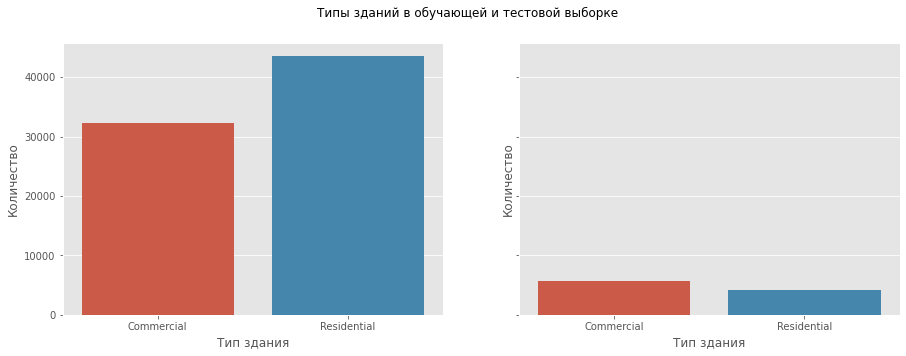

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Типы зданий в обучающей и тестовой выборке')

sns.countplot(ax=axes[0], data=train, x='building_class')
sns.countplot(ax=axes[1], data=test,x='building_class')
axes[0].set_xlabel('Тип здания')
axes[0].set_ylabel('Количество')
axes[1].set_xlabel('Тип здания')
axes[1].set_ylabel('Количество')

Text(0, 0.5, 'Количество')

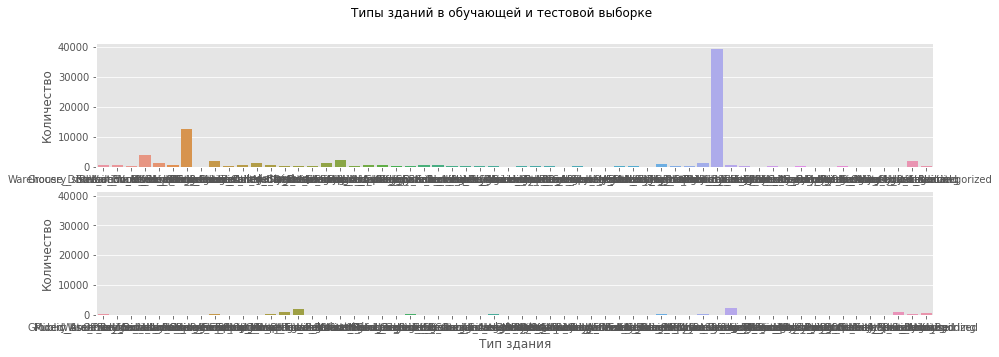

In [47]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Типы зданий в обучающей и тестовой выборке')

sns.countplot(ax=axes[0], data=train, x='facility_type')
sns.countplot(ax=axes[1], data=test,x='facility_type')
axes[0].set_xlabel('Тип здания')
axes[0].set_ylabel('Количество')
axes[1].set_xlabel('Тип здания')
axes[1].set_ylabel('Количество')

In [49]:
display(train['facility_type'].value_counts().head(), test['facility_type'].value_counts().head())

Multifamily_Uncategorized    39455
Office_Uncategorized         12512
Education_Other_classroom     3860
Lodging_Hotel                 2098
2to4_Unit_Building            1893
Name: facility_type, dtype: int64

Multifamily_Uncategorized    2199
Office_Uncategorized         1919
2to4_Unit_Building            966
Education_Other_classroom     890
5plus_Unit_Building           685
Name: facility_type, dtype: int64

Видно, что популярны многоквартирные дома и офисные здания общего назначения.

Text(0, 0.5, 'Количество')

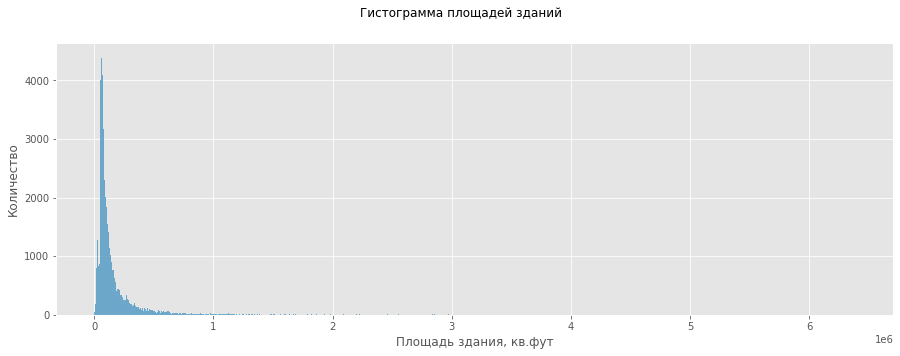

In [115]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Гистограмма площадей зданий')

sns.histplot(ax=axes, data=train, x='floor_area')
axes.set_xlabel('Площадь здания, кв.фут')
axes.set_ylabel('Количество')

Видим, что большинство зданий имеют площадь меньше 500000кв футов

Можно ожидать высокую корреляцию между энергопотреблением и площадю здания.

In [52]:
min_sq_ft = min(train['floor_area'])
max_sq_ft = max(train['floor_area'])
print("Min Square foot: {}\nMax Square foot: {}".format(min_sq_ft,max_sq_ft))

Min Square foot: 943.0
Max Square foot: 6385382.0


Text(0, 0.5, 'Количество')

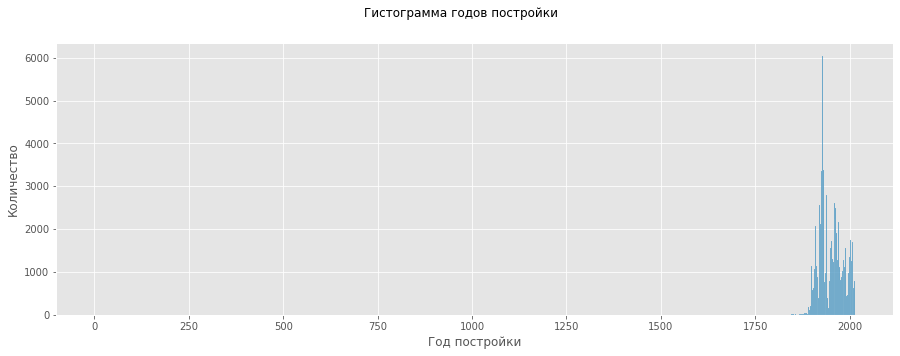

In [116]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Гистограмма годов постройки')

sns.histplot(ax=axes, data=train, x='year_built')
axes.set_xlabel('Год постройки')
axes.set_ylabel('Количество')

Мы наблюдаем резкий рост числа зданий, построенных примерно в 1960-1980 годах и после 2000 года.

Мы можем ожидать некоторой корреляции с годом выпуска и энергопотреблением, поскольку более новое оборудование обычно обладает большей энергоэффективностью.

In [55]:
min_year = min(train['year_built'])
max_year = max(train['year_built'])
print("Min Year built: {}\nMax Year built: {}".format(min_year,max_year))

Min Year built: 0.0
Max Year built: 2015.0


Видим, что минимальный год равен 0. Врядли дом построен в день рождения Христа, поэтому это должен быть выброс или NaN. Посмотрим.

In [104]:
# Отбросим NaN
temp_a = train.loc[train['year_built'].isna()==False]
display(train.shape, temp_a.shape, train.shape[0] - temp_a.shape[0])

(75757, 64)

(73920, 64)

1837

In [106]:
# Отбросим 0-ые значения
temp_b = temp_a.loc[temp_a['year_built'] > 0]
display(train.shape, temp_b.shape, train.shape[0] - temp_b.shape[0])

(75757, 64)

(73914, 64)

1843

Text(0, 0.5, 'Количество')

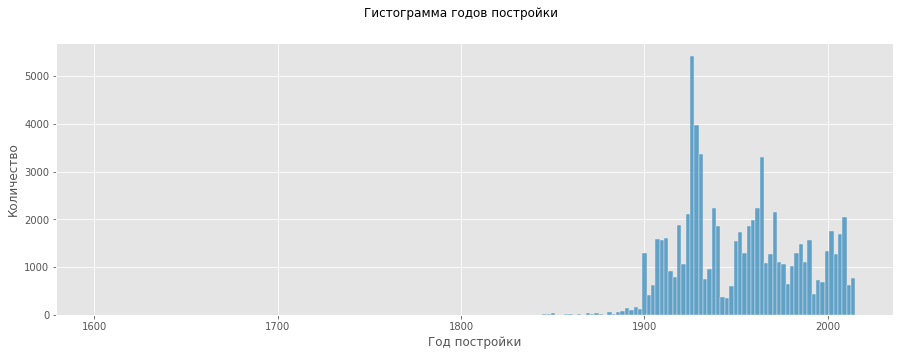

In [117]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Гистограмма годов постройки')

sns.histplot(ax=axes, data=temp_b, x='year_built')
axes.set_xlabel('Год постройки')
axes.set_ylabel('Количество')

In [97]:
min_year = min(temp_b['year_built'])
max_year = max(temp_b['year_built'])
print("Min Year built: {}\nMax Year built: {}".format(min_year,max_year))

Min Year built: 1600.0
Max Year built: 2015.0


Видно, что гистограмма нормализовалась. Есть здания-ветераны, но их немного.

Text(0, 0.5, 'Количество')

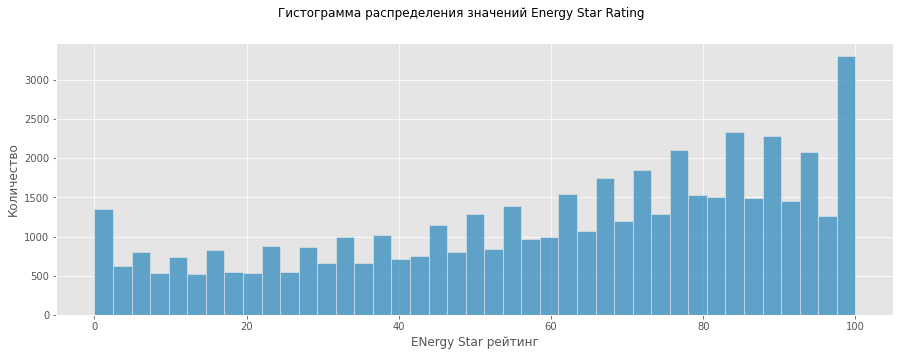

In [119]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Гистограмма распределения значений Energy Star Rating')

sns.histplot(ax=axes, data=train, x='energy_star_rating')
axes.set_xlabel('ENergy Star рейтинг')
axes.set_ylabel('Количество')

Непонятно, почему так много значений 100 рейтинга. Если обратиться к определению ESR - это оценка, которую владелец здания сам выставляет своему зданию. Думаю, много владельцев смухлевали.

Аналогично, почему 0-вых значений так много.

В контраст рассмотрим таргет переменную.

Text(0, 0.5, 'Количество')

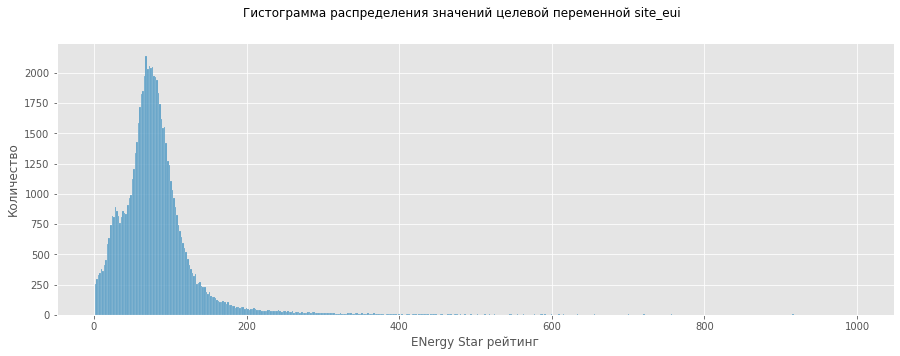

In [120]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5), sharey=True)
fig.suptitle('Гистограмма распределения значений целевой переменной site_eui')

sns.histplot(ax=axes, data=train, x='site_eui')
axes.set_xlabel('ENergy Star рейтинг')
axes.set_ylabel('Количество')

In [122]:
train['site_eui'].describe()

count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64

При среднем в ~83 максимальное 997. И на гистограмме видны выбросы. Посмотрим на них

In [130]:
train['site_eui'].dropna().sort_values().tail(20)

57126    900.732240
45003    901.092991
72672    903.667575
65650    904.544309
359      910.563198
17072    916.337619
58024    916.389344
51932    916.909240
9527     933.427176
29583    935.389315
66463    944.895706
30159    945.646313
20326    948.758564
46312    950.306820
9745     962.241793
6781     970.388586
28107    975.452321
55578    989.887978
28951    993.428259
61165    997.866120
Name: site_eui, dtype: float64

Видно, что здания потребляют много больше энергии, чем среднее. Возможно будет иметь смысл логарифмировать таргет.

# Зависимости переменных

Чтобы посмотреть на влияние категориальных переменных на оценку, мы можем построить график плотности, окрашенный значением категориальной переменной. Графики плотности также показывают распределение одной переменной и могут рассматриваться как сглаженная гистограмма. Если мы раскрасим кривые плотности категориальной переменной, это покажет нам, как меняется распределение в зависимости от класса.


Первый график, который мы сделаем, показывает распределение баллов по типу недвижимости. Чтобы не загромождать график, мы ограничим график типами зданий, в наборе данных которых содержится более 100 наблюдений.

In [131]:
# Create a list of buildings with more than 100 measurements
types = train.dropna(subset=['site_eui'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)

KeyError: 'Largest Property Use Type'

In [ ]:
type